In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch

fig, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
axr.set_box_aspect(1 / 3)
axr.yaxis.set_visible(False)
axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(x), np.sin(x), "k", lw=0.3)
point, = axl.plot(0, 0, "o")

# draw full curve to set view limits in right Axes
sine, = axr.plot(x, np.sin(x))

# draw connecting line between both graphs
con = ConnectionPatch(
    (1, 0),
    (0, 0),
    "data",
    "data",
    axesA=axl,
    axesB=axr,
    color="C0",
    ls="dotted",
)
fig.add_artist(con)


def animate(i):
    x = np.linspace(0, i, int(i * 25 / np.pi))
    sine.set_data(x, np.sin(x))
    x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    con.xy1 = x, y
    con.xy2 = i, y
    return point, sine, con


ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    blit=False,  # blitting can't be used with Figure artists
    frames=x,
    repeat_delay=100,
)

plt.close()
ani.save('temp1.gif')

In [ ]:
import random

# Create a figure and axes
fig, ax = plt.subplots()

# Define limits for random coordinates
x_min, x_max = 0, 10
y_min, y_max = 0, 10

# Generate random (x1, y1) and (x2, y2)
x1, y1 = random.uniform(x_min, x_max), random.uniform(y_min, y_max)
x2, y2 = random.uniform(x_min, x_max), random.uniform(y_min, y_max)

# Draw the line
def temp(ax):
    ax.plot([x1, x2], [y1, y2], marker="o", linestyle="-", color="k")
    return ax

ax = temp(ax)

# Set axis limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Show grid for better visualization
ax.grid(True)

# Display the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import random
import matplotlib.animation as animation

# Variables
x_min, x_max = 0, 10
y_min, y_max = 0, 10
no_of_matches_touched = 0
pi_val = 0
matches = []

# Classes

# Describes a match
class Match:
    L = 1
    
    def __init__(self, x=None, y=None, theta=None): 
        '''
        We need 4 values to describe a match. (x, y, theta, L)
        - x, y -> Coordinates
        - theta -> Angle made with the x-axis
        - L -> Length of the match

        L defaults to 1 if not provided. Rest of the variables are randomly selected if not provided
        '''
        
        self.x = x if x else random.uniform(x_min, x_max)
        self.y = y if y else random.uniform(y_min, y_max)
        self.theta = theta if theta else np.radians(random.uniform(0, 360))
        self.L = L
        self.match_head_radius = self.L / 20

        self.match_parts = []

    # Plots the match. Based on whether touching a line, can have another color
    def plot_match(self, ax, on_line = False):
        lby2_sin_theta = np.sin(self.theta) * (self.L / 2)
        lby2_cos_theta = np.cos(self.theta) * (self.L / 2)

        # Plots the wooden part
        line = ax.plot([self.x - lby2_cos_theta, self.x + lby2_cos_theta],
                [self.y - lby2_sin_theta, self.y + lby2_sin_theta], 
                color=('b' if on_line else 'y'), linewidth=3, solid_capstyle='round', zorder = 2)

        # Plots the head
        head = Circle((self.x + lby2_cos_theta, self.y + lby2_sin_theta), self.match_head_radius, color = ('g' if on_line else 'r'), zorder = 3)
        ax.add_patch(head)

        self.match_parts = [head, line]

    # Removes the matches from the plot
    def destroy(self, ax):
        ax.lines.remove(self.match_parts[0])
        ax.patches.remove(self.match_parts[1])

        self.match_parts = []


# This class describes the board
class Board:
    def __init__(self, d=1):
        self.d = d
        self.lines = [y for y in range(0, y_max+1, self.d)] # y_max should be perfectly divided by self.d [IMP for acccuracy]

    # Draws each line
    def plot_board(self, ax):
        for line_y in self.lines:
            ax.plot([x_min, x_max], [line_y, line_y], color='k')

    # Checks if touching a match
    def is_touching(self, match) -> bool:
        lby2_sin_theta = np.sin(match.theta) * (match.L / 2)
        y = match.y
            
        for line_y in self.lines:
            # If a match is 
            if (line_y < y + lby2_sin_theta and line_y > y - lby2_sin_theta) or (line_y < y - lby2_sin_theta and line_y > y + lby2_sin_theta):
                return True

        return False


def buffons_matches(L : int, d : int):
    if (L <= 0 or d <= 0):
        raise ValueError("Invalid values for L or d")
    Match.L = L if L else 1

    fig, ax = plt.subplots()
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max), aspect=1)

    board = Board(d)
    board.plot_board(ax)

    no_of_matches_touched = 0
    pi_val = 0
    matches = []

    ani = animation.FuncAnimation(
        fig, 
        loop, 
        interval=100,
        blit=True,  # Enable blitting for smoother animation
        cache_frame_data=False,
        frames = 100,
        init_func=reset_vars
    )
    
    plt.close()
    ani.save("q1.gif")
    print(f"ratio: {ratio_val}")


In [ ]:
buffons_matches(1, 2)

In [92]:
def birthday_probability(n : int, k : int):
    trials = 500
    count = 0
    for i in range(trials):
        freq = {}
        arr = np.random.randint(0, 365, n)
        for num in arr:
            try:
                freq[num] += 1
            except:
                freq[num] = 1
        if (sorted(freq.values())[-1] >= k): count += 1
    return count / trials

In [102]:
# Implemented based on the knowledge that as n inc, prob inc (Binary search)
def find_min_n(prb_greater_than, n_max = 365, n_min = 2):
    if (n_max - n_min == 1): return n_max
    
    if n_max > 365:
        n_max = 365
    if n_min < 2:
        n_min = 2
    
    prb_mid = birthday_probability((n_max + n_min) // 2, 2)
    print(f"For n: {(n_max + n_min) // 2} -> Approx Probability: {prb_mid:.4f}")

    if (prb_greater_than > prb_mid):
        return find_min_n(prb_greater_than, n_max, (n_max + n_min)//2)
    elif (prb_greater_than < prb_mid):
        return find_min_n(prb_greater_than, (n_max + n_min)//2, n_min)

In [104]:
find_min_n(0.7)

For n: 183 -> Approx Probability: 1.0000
For n: 92 -> Approx Probability: 1.0000
For n: 47 -> Approx Probability: 0.9557
For n: 24 -> Approx Probability: 0.5349
For n: 35 -> Approx Probability: 0.8147
For n: 29 -> Approx Probability: 0.6832
For n: 32 -> Approx Probability: 0.7528
For n: 30 -> Approx Probability: 0.7085


30

In [136]:
y = [birthday_probability(x_i, 2) for x_i in x]

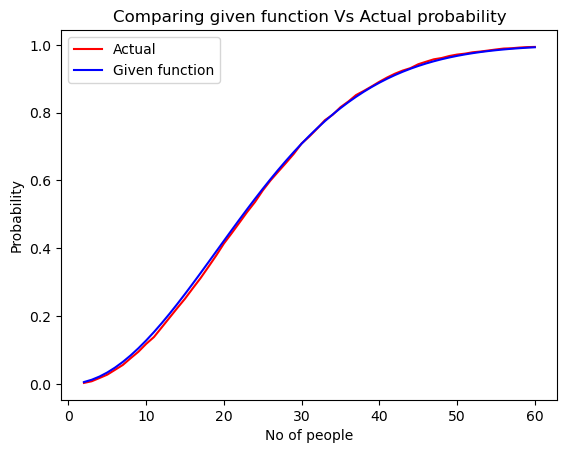

In [144]:
import numpy as np
import matplotlib.pyplot as plt

def given_func(x):
    return 1 - np.exp(-(x*x)/730)

x = np.linspace(2, 60, 59, dtype=int)

plt.plot(x, y, color='r', label="Actual")
plt.plot(x, given_func(x), color='b', label="Given function")
plt.title("Comparing given function Vs Actual probability")
plt.xlabel("No of people")
plt.ylabel("Probability")
plt.legend()
plt.show()